## Try to max out score with ensemble learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.shape

(42000, 785)

In [5]:
target = train_data['label']
train_vars = train_data.drop(['label'],axis=1)

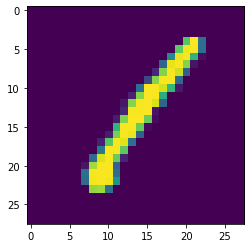

In [6]:
plt.imshow(np.asarray(train_vars.iloc[0]).reshape((28,28)))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [51]:
X = train_vars
y = target

X_train, X_test, y_train, y_test = train_test_split(X/255,y,test_size = 0.33)

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

/home/ben/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
print('Accuracy on test set: {}'.format(rf.score(X_test,y_test)))

Accuracy on test set: 0.9361471861471862


In [11]:
from sklearn import svm
s = svm.SVC(gamma = 'scale')
s.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = s.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy: {}'.format(acc))

Accuracy: 0.9745310245310246


In [14]:
test_data = pd.read_csv('test.csv')

In [15]:
test_data.shape

(28000, 784)

In [16]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
svm_predictions = s.predict(test_data/255)

In [20]:
svm_predictions

array([2, 0, 9, ..., 3, 9, 2])

In [26]:
ImageId = np.arange(1,test_data.shape[0]+1,1)

In [27]:
sub = pd.DataFrame({'ImageId':ImageId, 'Label':svm_predictions})

In [29]:
sub.to_csv('svm_submission.csv',index=False)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()
k.fit(X_train,y_train)
y_pred = k.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print('Accuracy: {}'.format(acc))

Accuracy: 0.967027417027417


### Now time for a CNN

In [52]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [53]:
from tensorflow.keras import layers, models

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(1568, (4,4),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (7,7),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (2,2),activation='relu'))

In [58]:
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 1568)      26656     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 1568)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         9834624   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 32)          16416     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [68]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,np.array(y_train),epochs=3,validation_split=0.2)

Train on 22512 samples, validate on 5628 samples
Epoch 1/3
22512/22512 [==============================] - 797s 35ms/sample - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 2/3
22512/22512 [==============================] - 784s 35ms/sample - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0623 - val_accuracy: 0.9815
Epoch 3/3
 4384/22512 [====>.........................] - ETA: 10:15 - loss: 0.0179 - accuracy: 0.9952

KeyboardInterrupt: 

In [69]:
model.evaluate(X_test,np.array(y_test))

13860/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06030424882591975, 0.98318905]

In [70]:
NN_test = test_data/255

In [71]:
NN_test = NN_test.values.reshape(NN_test.shape[0],28,28,1)

In [74]:
cnn_predictions = model.predict_classes(NN_test)

In [75]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [76]:
sub = pd.DataFrame({'ImageId':ImageId, 'Label':cnn_predictions})

In [78]:
sub.to_csv("CNN.csv",index=False)